# Actividad - Regresión Lineal

* **Nombre:** Edgar Roann Santillan Bernal
* **Matrícula:** A00572737

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [ ]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SemanaTec/
%cd datasets/
%ls
file_path = "/gdrive/MyDrive/SemanaTec/datasets/presion.csv"

Mounted at /gdrive
/gdrive/MyDrive/SemanaTec
/gdrive/MyDrive/SemanaTec/datasets
'bestsellers with categories.csv'   insurance.csv   netflix_titles.csv   presion.csv


In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.


df = pd.read_csv(file_path)


print(df.head(6))

   Age  Average of ap_hi  Average of ap_lo
0   30        112.500000         72.500000
1   39        119.029340         88.229829
2   40        119.789630         85.858889
3   41        121.490862         90.344648
4   42        120.163872         89.887957
5   43        141.294203         93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

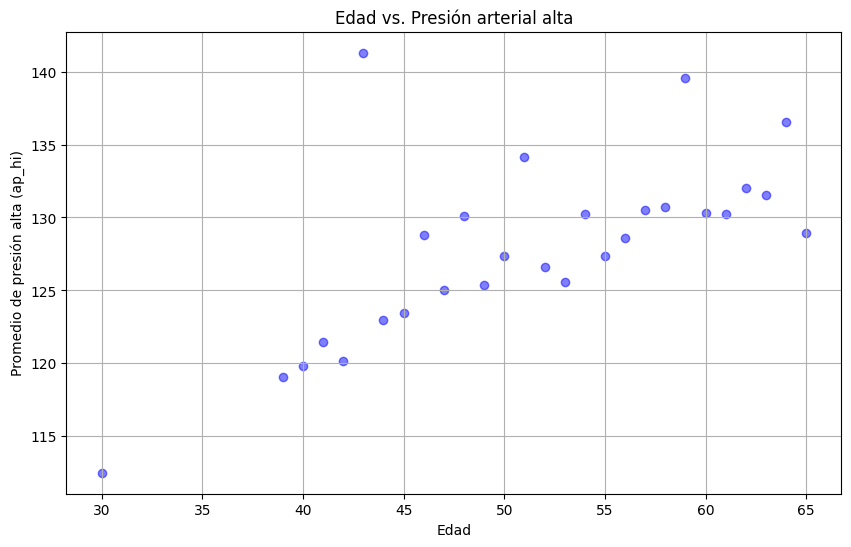

In [ ]:
# Grafica la información de la edad y presión alta
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average of ap_hi'], color='blue', alpha=0.5)
plt.title('Edad vs. Presión arterial alta')
plt.xlabel('Edad')
plt.ylabel('Promedio de presión alta (ap_hi)')
plt.grid(True)
plt.show()

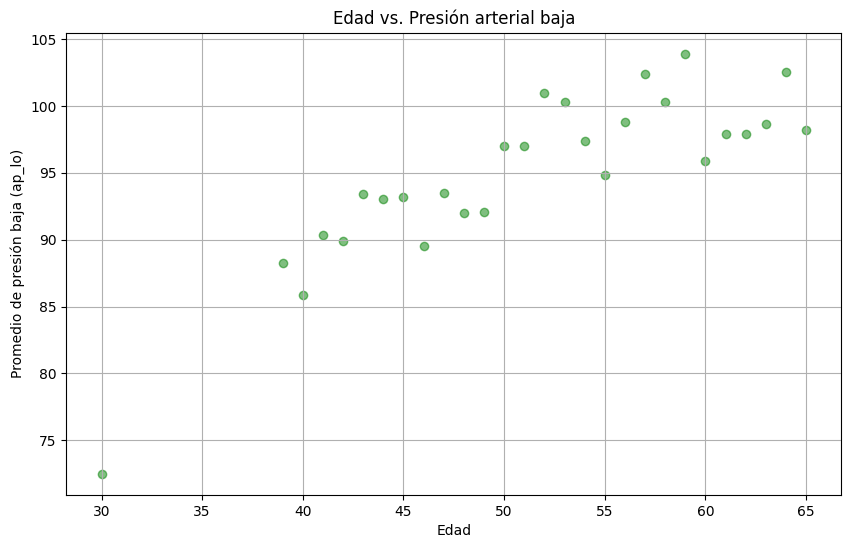

In [ ]:
# Grafica la información de la edad y presión baja
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average of ap_lo'], color='green', alpha=0.5)
plt.title('Edad vs. Presión arterial baja')
plt.xlabel('Edad')
plt.ylabel('Promedio de presión baja (ap_lo)')
plt.grid(True)
plt.show()


Genera una regresión líneal para obtener una aproximación de la ecuación
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [ ]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?

X = df[['Age']]
y = df['Average of ap_hi']

model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_

print("El valor de a (pendiente) para la presión alta es:", a)
print("El valor de b (intersección) para la presión alta es:", b)

El valor de a (pendiente) para la presión alta es: 0.47769702977669154
El valor de b (intersección) para la presión alta es: 103.3969740964366


In [ ]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?

X = df[['Age']]
y = df['Average of ap_lo']

model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_

print("El valor de a (pendiente) para la presión baja es:", a)
print("El valor de b (intersección) para la presión baja es:", b)

El valor de a (pendiente) para la presión baja es: 0.6089810580238237
El valor de b (intersección) para la presión baja es: 63.726200409422745


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde)

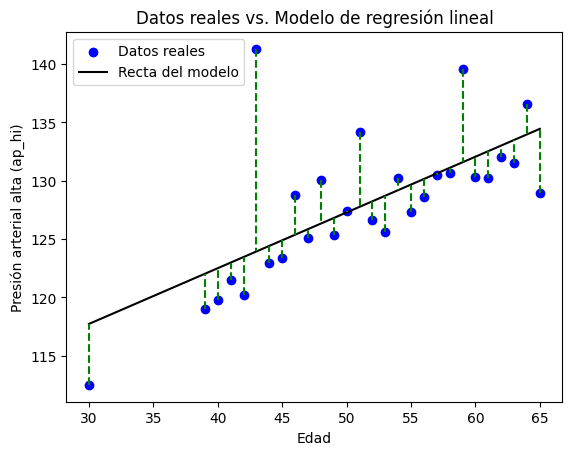

In [ ]:
# Presión alta

X = df[['Age']]
y = df['Average of ap_hi']

model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Datos reales')

plt.plot(X, y_pred, color='black', label='Recta del modelo')

for i in range(len(X)):
    plt.plot([X.iloc[i], X.iloc[i]], [y.iloc[i], y_pred[i]], color='green', linestyle='--')

plt.xlabel('Edad')
plt.ylabel('Presión arterial alta (ap_hi)')
plt.title('Datos reales vs. Modelo de regresión lineal')
plt.legend()

plt.show()

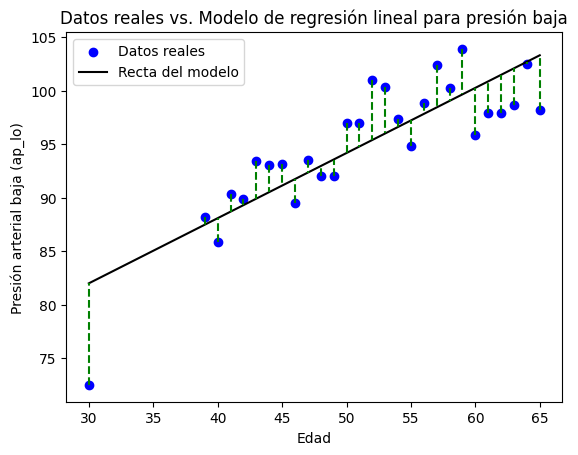

In [ ]:
# Presión baja

X = df[['Age']]
y = df['Average of ap_lo']

model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Datos reales')

plt.plot(X, y_pred, color='black', label='Recta del modelo')

for i in range(len(X)):
    plt.plot([X.iloc[i], X.iloc[i]], [y.iloc[i], y_pred[i]], color='green', linestyle='--')

plt.xlabel('Edad')
plt.ylabel('Presión arterial baja (ap_lo)')
plt.title('Datos reales vs. Modelo de regresión lineal para presión baja')
plt.legend()

plt.show()

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [ ]:
def pressure_low(age):
  a_low = -0.02158996  # Pendiente
  b_low = 83.19465161  # Intersección

  return a_low * age + b_low

query_age = 76
print("Presión arterial baja para la edad {}: {:.2f}".format(query_age, pressure_low(query_age)))


Presión arterial baja para la edad 76: 81.55


In [ ]:
def pressure_high(age):
    a_high = 0.357971  # Pendiente
    b_high = 95.6508411  # Intersección

    return a_high * age + b_high

query_age = 76
print("Presión arterial alta para la edad {}: {:.2f}".format(query_age, pressure_high(query_age)))

Presión arterial alta para la edad 76: 122.86
